In [1]:
import pandas as pd

data = pd.read_csv("datasets/news.csv")

data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [3]:
data.fillna("unavailable", inplace = True)

In [4]:
data["news"] = data['author'] + " " + data['title'] + " " + data['text']

In [ ]:
import nltk

nltk.download("stopwords")

In [5]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

stop_words = stopwords.words("english")
stemmer = PorterStemmer()

In [17]:
import re

def process_text(text):
  text = "".join([re.sub("[^a-zA-Z]", " ", char) for char in text])
  text = text.lower()
  text = text.split()
  text = [stemmer.stem(word) for word in text if word not in set(stop_words)]
  text = " ".join(text)

  return text

In [18]:
data["news"] = data["news"].apply(process_text)

In [21]:
from tensorflow.keras.preprocessing.text import one_hot

vocabularies_size = 40

sample_data = [
  "This is an example sentence",
  "Anthor sentence for demonstration purpose",
  "Yet another sentence to encode"
]

encoded_data = [one_hot(text, vocabularies_size) for text in sample_data]

for text, encoded_text in zip(sample_data, encoded_data):
  print(f"{text} => {encoded_text}")

This is an example sentence => [18, 37, 6, 12, 23]
Anthor sentence for demonstration purpose => [4, 23, 1, 29, 23]
Yet another sentence to encode => [25, 28, 23, 20, 5]


In [26]:
vocabularies_size = 50000

news_list = data["news"]

news_list = [one_hot(news, vocabularies_size) for news in news_list]

print(news_list[0])

[29406, 33180, 2128, 22852, 40955, 30187, 38270, 15114, 36158, 16282, 5664, 14407, 2128, 22852, 40955, 30187, 38270, 15114, 36158, 16282, 5664, 14407, 29406, 33180, 9517, 12686, 16282, 5664, 17661, 38832, 244, 28969, 41237, 3441, 13039, 43632, 35259, 10179, 20302, 15928, 25662, 12561, 18908, 32887, 31637, 7641, 2699, 22456, 9528, 33218, 36764, 15114, 45201, 2128, 21638, 40955, 28533, 2903, 21470, 20908, 43613, 31637, 7641, 26894, 8158, 15114, 22534, 18781, 36158, 46584, 9528, 28533, 45078, 35937, 1165, 45176, 1994, 45078, 38386, 47794, 21638, 11654, 8547, 37416, 15114, 35105, 14740, 14407, 49188, 11517, 8547, 9678, 20908, 15114, 39665, 11517, 9678, 21638, 47794, 11162, 2128, 14203, 45839, 3777, 8547, 12402, 27610, 45078, 41127, 46609, 2115, 38270, 47486, 35748, 15935, 8655, 36158, 1152, 3777, 8547, 46509, 16282, 5664, 15486, 16512, 2699, 20829, 14407, 9528, 7922, 15935, 9528, 49688, 33411, 45078, 24353, 30066, 47918, 26749, 34784, 16282, 5664, 38104, 9517, 41857, 20908, 26749, 15114, 1

In [28]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 500

x = pad_sequences(news_list, padding = "post", maxlen = maxlen)
y = data["label"].values

print(x[0])

[29406 33180  2128 22852 40955 30187 38270 15114 36158 16282  5664 14407
  2128 22852 40955 30187 38270 15114 36158 16282  5664 14407 29406 33180
  9517 12686 16282  5664 17661 38832   244 28969 41237  3441 13039 43632
 35259 10179 20302 15928 25662 12561 18908 32887 31637  7641  2699 22456
  9528 33218 36764 15114 45201  2128 21638 40955 28533  2903 21470 20908
 43613 31637  7641 26894  8158 15114 22534 18781 36158 46584  9528 28533
 45078 35937  1165 45176  1994 45078 38386 47794 21638 11654  8547 37416
 15114 35105 14740 14407 49188 11517  8547  9678 20908 15114 39665 11517
  9678 21638 47794 11162  2128 14203 45839  3777  8547 12402 27610 45078
 41127 46609  2115 38270 47486 35748 15935  8655 36158  1152  3777  8547
 46509 16282  5664 15486 16512  2699 20829 14407  9528  7922 15935  9528
 49688 33411 45078 24353 30066 47918 26749 34784 16282  5664 38104  9517
 41857 20908 26749 15114 15786 46637 27610 45078 41737 42073 26749 20908
 40047 24552  3822 32283 42257 31032 20268 10915  5

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, random_state = 42)

In [34]:
from keras import Sequential
from keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Dropout

model = Sequential([
  Input(shape = (maxlen,)),
  Embedding(input_dim = vocabularies_size, output_dim = 50),
  Bidirectional(LSTM(100)),
  Dropout(0.1),
  Dense(1, activation = "sigmoid")
])

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [36]:
model_output = model.fit(x_train, y_train, batch_size = 124, epochs = 20, validation_data = (x_valid, y_valid))

Epoch 1/20


126/126 ━━━━━━━━━━━━━━━━━━━━ 513s 4s/step - accuracy: 0.9277 - loss: 0.1943 - val_accuracy: 0.9544 - val_loss: 0.1358
Epoch 2/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 479s 3s/step - accuracy: 0.9810 - loss: 0.0660 - val_accuracy: 0.9594 - val_loss: 0.1149
Epoch 3/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 430s 3s/step - accuracy: 0.9903 - loss: 0.0354 - val_accuracy: 0.9544 - val_loss: 0.1222
Epoch 4/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 420s 3s/step - accuracy: 0.9906 - loss: 0.0342 - val_accuracy: 0.9488 - val_loss: 0.1554
Epoch 5/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 426s 3s/step - accuracy: 0.9956 - loss: 0.0183 - val_accuracy: 0.9567 - val_loss: 0.1376
Epoch 6/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 423s 3s/step - accuracy: 0.9944 - loss: 0.0174 - val_accuracy: 0.9544 - val_loss: 0.1760
Epoch 7/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 428s 3s/step - accuracy: 0.9990 - loss: 0.0053 - val_accuracy: 0.9542 - val_loss: 0.1743
Epoch 8/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 424s 3s/step - accuracy: 0.9993 - loss: 0.0024 - val_accuracy: 0.953

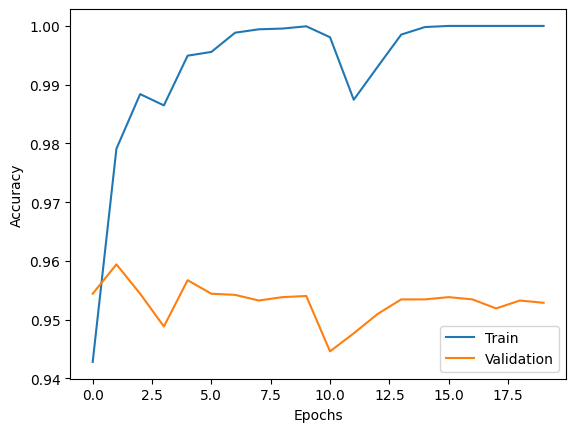

In [37]:
import matplotlib.pyplot as plt

plt.plot(model_output.history["accuracy"], label = "Train")
plt.plot(model_output.history["val_accuracy"], label = "Validation")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [38]:
model.save("25-dumps/model.keras")

In [39]:
title = "House Dem Aide: We Didn't Even See Comey's Letter Until Jason Chaffetz Tweeted It"
author = "Darrell Lucus"
text='''
House Dem Aide: We Didn't Even See Comey's Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) 
With apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton's email server, the ranking Democrats on the relevant committees didn't hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. 
As we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emails it had recently discovered in order to see if they contained classified information. Not long after this letter went out, Oversight Committee Chairman Jason Chaffetz set the political world ablaze with this tweet. FBI Dir just informed me, ""The FBI has learned of the existence of emails that appear to be pertinent to the investigation.
'''

In [40]:
news = author + " " + title + " " + text
news = process_text(news)
news = one_hot(news, vocabularies_size)
news = pad_sequences([news], padding = "post", maxlen = maxlen)

In [41]:
predictions = model.predict([news])
  
print("Fake!" if predictions[0] > 0.5 else "True!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
Fake!
